In [2]:
import pandas as pd

employee_data = pd.read_csv('Employee.csv')

In [4]:
employee_data

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [6]:
#Q1
# Unique values and their counts
unique_values_summary = {
    column: {
        "Unique Values": employee_data[column].dropna().unique().tolist(),
        "Count": len(employee_data[column].dropna().unique())
    }
    for column in employee_data.columns
}

statistical_analysis = employee_data.describe()

employee_data.rename(columns=str.lower, inplace=True)

print("Unique Values and Their Counts:")
for column, details in unique_values_summary.items():
    print(f"{column}: {details['Count']} unique values")
    print(f"Unique Values: {details['Unique Values']}\n")

print("\nStatistical Analysis:")
print(statistical_analysis)
print("\nRenamed Columns:")
print(employee_data.columns.tolist())



Unique Values and Their Counts:
Company: 6 unique values
Unique Values: ['TCS', 'Infosys', 'CTS', 'Tata Consultancy Services', 'Congnizant', 'Infosys Pvt Lmt']

Age: 29 unique values
Unique Values: [20.0, 30.0, 35.0, 40.0, 23.0, 34.0, 45.0, 18.0, 22.0, 32.0, 37.0, 50.0, 21.0, 46.0, 36.0, 26.0, 41.0, 24.0, 25.0, 43.0, 19.0, 38.0, 51.0, 31.0, 44.0, 33.0, 17.0, 0.0, 54.0]

Salary: 40 unique values
Unique Values: [2300.0, 3000.0, 4000.0, 5000.0, 6000.0, 7000.0, 8000.0, 9000.0, 1089.0, 1234.0, 3030.0, 3045.0, 3184.0, 4824.0, 5835.0, 7084.0, 8943.0, 8345.0, 9284.0, 9876.0, 2034.0, 7654.0, 2934.0, 4034.0, 5034.0, 8202.0, 9024.0, 4345.0, 6544.0, 6543.0, 3234.0, 4324.0, 5435.0, 5555.0, 8787.0, 3454.0, 5654.0, 5009.0, 5098.0, 3033.0]

Place: 11 unique values
Unique Values: ['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin', 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune']

Country: 1 unique values
Unique Values: ['India']

Gender: 2 unique values
Unique Values: [0, 1]


Statistic

In [12]:
#Q2
import pandas as pd
import numpy as np

employee_data.columns = employee_data.columns.str.lower()

employee_data['age'] = employee_data['age'].replace(0, np.nan)

employee_data = employee_data.drop_duplicates()

missing_values = employee_data.isnull().sum()

employee_data['age'] = employee_data['age'].fillna(employee_data['age'].mean())
employee_data['salary'] = employee_data['salary'].fillna(employee_data['salary'].mean())

employee_data['company'] = employee_data['company'].fillna(employee_data['company'].mode()[0])
employee_data['place'] = employee_data['place'].fillna(employee_data['place'].mode()[0])

def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outliers_age, lower_age, upper_age = find_outliers_iqr(employee_data, 'age')
outliers_salary, lower_salary, upper_salary = find_outliers_iqr(employee_data, 'salary')

employee_data['age'] = np.clip(employee_data['age'], lower_age, upper_age)
employee_data['salary'] = np.clip(employee_data['salary'], lower_salary, upper_salary)

final_missing_values = employee_data.isnull().sum()

print("Initial Missing Values:")
print(missing_values)
print("\nFinal Missing Values After Treatment:")
print(final_missing_values)
print("\nSample of Cleaned Data:")
print(employee_data.head())


Initial Missing Values:
company    0
age        0
salary     0
place      0
country    0
gender     0
dtype: int64

Final Missing Values After Treatment:
company    0
age        0
salary     0
place      0
country    0
gender     0
dtype: int64

Sample of Cleaned Data:
   company   age       salary     place country  gender
0      TCS  20.0  5283.471074   Chennai   India       0
1  Infosys  30.0  5283.471074    Mumbai   India       0
2      TCS  35.0  2300.000000  Calcutta   India       0
3  Infosys  40.0  3000.000000     Delhi   India       0
4      TCS  23.0  4000.000000    Mumbai   India       0


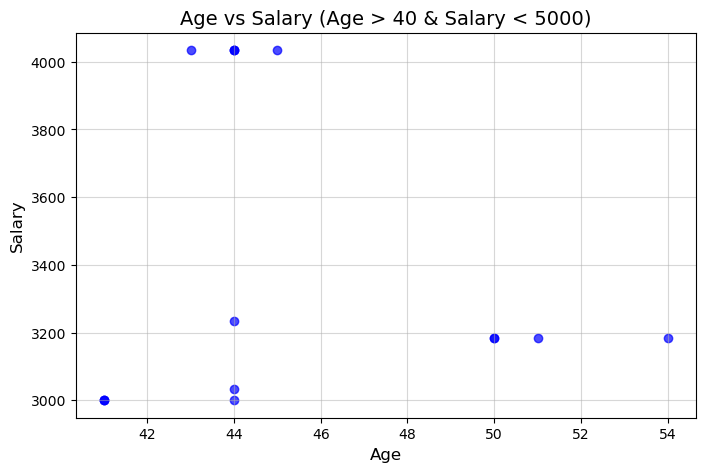

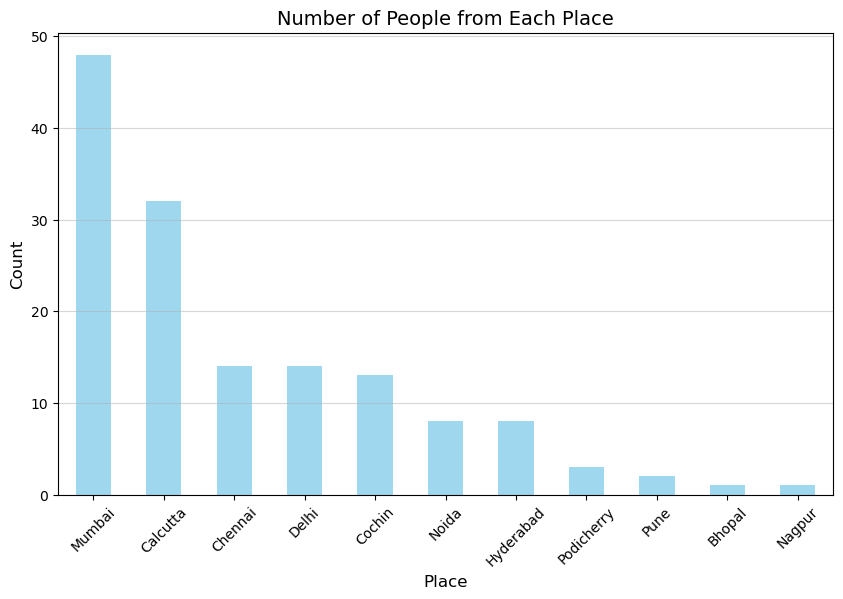

In [14]:
#Q3
import pandas as pd
import matplotlib.pyplot as plt

filtered_data = employee_data[(employee_data['age'] > 40) & (employee_data['salary'] < 5000)]

plt.figure(figsize=(8, 5))
plt.scatter(filtered_data['age'], filtered_data['salary'], color='blue', alpha=0.7)
plt.title('Age vs Salary (Age > 40 & Salary < 5000)', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

place_counts = employee_data['place'].value_counts()

plt.figure(figsize=(10, 6))
place_counts.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Number of People from Each Place', fontsize=14)
plt.xlabel('Place', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.show()


In [20]:
#Q4
import pandas as pd
from sklearn.preprocessing import LabelEncoder

file_path = 'Employee.csv'
employee_data = pd.read_csv(file_path)
employee_data.columns = employee_data.columns.str.lower()

categorical_columns = employee_data.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
for column in categorical_columns:
    employee_data[column] = label_encoder.fit_transform(employee_data[column].astype(str))

print("Transformed Dataset (with encoded categorical variables):")
print(employee_data.head())


Transformed Dataset (with encoded categorical variables):
   company   age  salary  place  country  gender
0        4  20.0     NaN      2        0       0
1        2  30.0     NaN      6        0       0
2        4  35.0  2300.0      1        0       0
3        2  40.0  3000.0      4        0       0
4        4  23.0  4000.0      6        0       0


In [22]:
#Q5
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

categorical_columns = employee_data.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
for column in categorical_columns:
    employee_data[column] = label_encoder.fit_transform(employee_data[column].astype(str))

scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

columns_to_scale = employee_data.columns

standard_scaled_data = pd.DataFrame(
    scaler_standard.fit_transform(employee_data),
    columns=columns_to_scale
)

minmax_scaled_data = pd.DataFrame(
    scaler_minmax.fit_transform(employee_data),
    columns=columns_to_scale
)

print("Data Scaled with StandardScaler:")
print(standard_scaled_data.head())

print("\nData Scaled with MinMaxScaler:")
print(minmax_scaled_data.head())

Data Scaled with StandardScaler:
    company       age    salary     place  country    gender
0  0.848436 -0.948501       NaN -0.852542      0.0 -0.535683
1 -0.272712 -0.043841       NaN  0.428435      0.0 -0.535683
2  0.848436  0.408489 -1.175200 -1.172787      0.0 -0.535683
3 -0.272712  0.860819 -0.902122 -0.212054      0.0 -0.535683
4  0.848436 -0.677103 -0.512010  0.428435      0.0 -0.535683

Data Scaled with MinMaxScaler:
    company       age    salary     place  country  gender
0  0.666667  0.370370       NaN  0.181818      0.0     0.0
1  0.333333  0.555556       NaN  0.545455      0.0     0.0
2  0.666667  0.648148  0.137817  0.090909      0.0     0.0
3  0.333333  0.740741  0.217480  0.363636      0.0     0.0
4  0.666667  0.425926  0.331285  0.545455      0.0     0.0
